## Working with Quadkey in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/16_quadkey.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/16_quadkey.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/16_quadkey.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/16_quadkey.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2quadkey

In [2]:
from vgrid.conversion.latlon2dggs import latlon2quadkey

lat = 10.775276
lon = 106.706797
res = 14
quadkey_id = latlon2quadkey(lat, lon, res)
quadkey_id

'13223011131020'

### Quadkey to Polygon

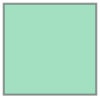

In [3]:
from vgrid.conversion.dggs2geo.quadkey2geo import quadkey2geo

quadkey_geo = quadkey2geo(quadkey_id)
quadkey_geo

### Quadkey to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.quadkey2geo import quadkey2geojson

quadkey_geojson = quadkey2geojson(quadkey_id)
# quadkey_geojson

### Vector to Quadkey

Processing features: 100%|██████████| 4/4 [00:00<00:00, 26.18it/s]


<Axes: >

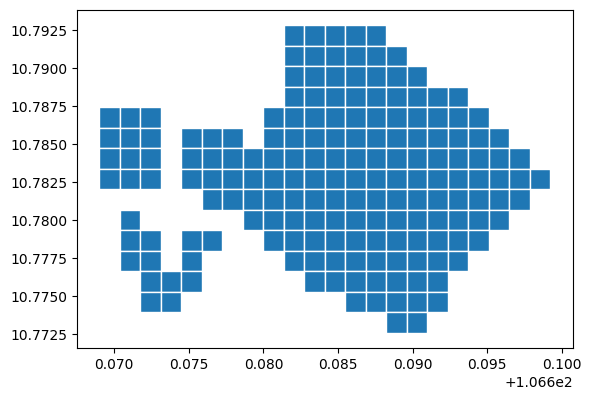

In [5]:
from vgrid.conversion.vector2dggs.vector2quadkey import vector2quadkey

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_quadkey = vector2quadkey(
    file_path, resolution=18, compact=False, predicate="intersects", output_format="gpd"
)
# Visualize the output
vector_to_quadkey.plot(edgecolor="white")

### Quadkey Compact

<Axes: >

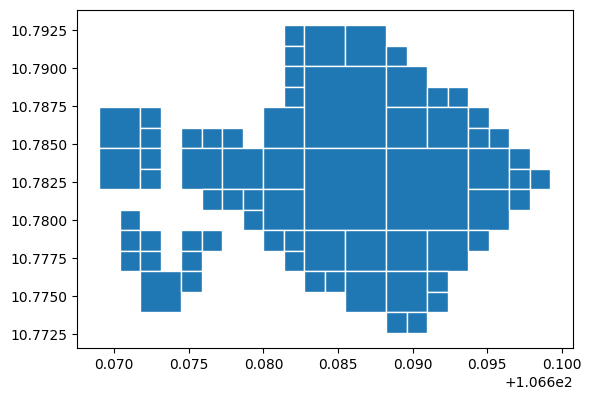

In [6]:
from vgrid.conversion.dggscompact.quadkeycompact import quadkeycompact

quadkey_compacted = quadkeycompact(
    vector_to_quadkey, quadkey_id="quadkey", output_format="gpd"
)
quadkey_compacted.plot(edgecolor="white")

### Quadkey Expand

<Axes: >

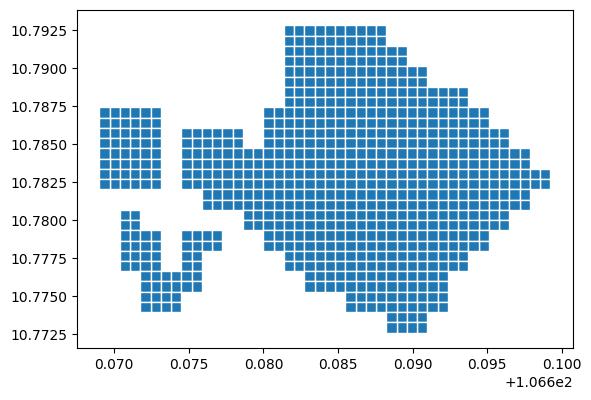

In [7]:
from vgrid.conversion.dggscompact.quadkeycompact import quadkeyexpand

quadkey_expanded = quadkeyexpand(vector_to_quadkey, resolution=19, output_format="gpd")
quadkey_expanded.plot(edgecolor="white")

### Quadkey Binning

Generating Quadkey DGGS: 768 cells [00:00, 2228.08 cells/s]


<Axes: >

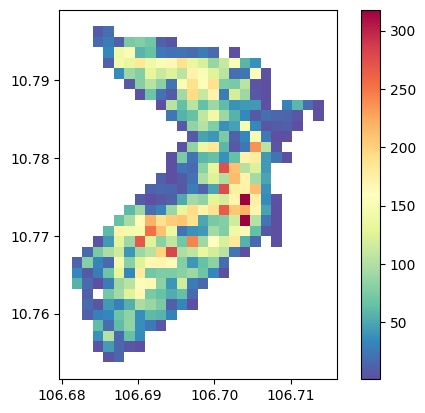

In [8]:
from vgrid.binning.quadkeybin import quadkeybin

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
quadkey_bin = quadkeybin(
    file_path,
    resolution=18,
    stats=stats,
    # numeric_field="confidence",
    # category="category",
    output_format="gpd",
)
quadkey_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to Quadkey

#### Download and open raster

rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


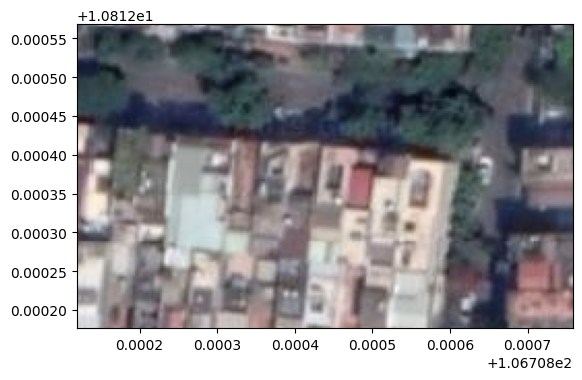

<Axes: >

In [1]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to Quadkey

In [9]:
# %pip install folium

In [2]:
from vgrid.conversion.raster2dggs.raster2quadkey import raster2quadkey

raster_to_quadkey = raster2quadkey(raster_file, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

quadkey_layer = folium.GeoJson(
    raster_to_quadkey,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["quadkey", "band_1", "band_2", "band_3"],
        aliases=["Quadkey ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(quadkey_layer.get_bounds())

# Display the map
m

Cell size: 0.08638527081938627 m2
Nearest quadkey resolution determined: 26


Converting raster to Quadkey: 100%|██████████| 8925/8925 [00:00<00:00, 23134.54 cells/s]


### Quadkey Generator

Generating Quadkey DGGS: 195 cells [00:00, 1846.43 cells/s]


<Axes: >

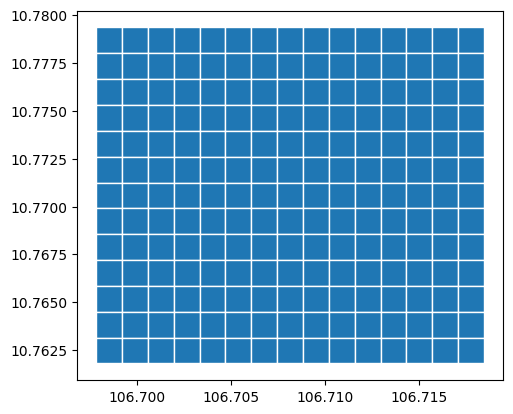

In [11]:
from vgrid.generator.quadkeygrid import quadkeygrid

# quadkey_grid = quadkeygrid(resolution=2,output_format="gpd")
quadkey_grid = quadkeygrid(
    resolution=18,
    bbox=[106.699007, 10.762811, 106.717674, 10.778649],
    output_format="gpd",
)
quadkey_grid.plot(edgecolor="white")

### Quadkey Inspect

In [1]:
from vgrid.stats.quadkeystats import quadkeyinspect

resolution = 7
quadkey_inspect = quadkeyinspect(resolution)
quadkey_inspect.head()

Generating Quadkey DGGS: 16384 cells [00:01, 10207.75 cells/s]


quadkey  resolution  center_lat  center_lon    cell_width   cell_height  \
0  0000000           7   84.926801  -178.59375  28454.129379  27771.076917   
1  0000002           7   84.671917  -178.59375  29879.298302  29162.168544   
2  0000020           7   84.404267  -178.59375  31375.155502  30622.279581   
3  0000022           7   84.123216  -178.59375  32945.097361  32154.729646   
4  0000200           7   83.828101  -178.59375  34592.666003  33762.981365   

      cell_area  cell_perimeter  \
0  7.711209e+08   111092.677554   
1  8.503136e+08   116657.764770   
2  9.375993e+08   122499.012966   
3  1.033796e+09   128629.712154   
4  1.139804e+09   135063.726094   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 84.80247, -177.1875 84.80247, -...    False   0.024863   
1  POLYGON ((-180 84.54136, -177.1875 84.54136, -...    False   0.027416   
2  POLYGON ((-180 84.26717, -177.1875 84.26717, -...    False   0.030231   
3  POLYGON ((-180 83.97926, -177.1875 83.97926, -...    False   0.033332   
4  POLYGON ((-180 83.67694, -177.1875 83.67694, -...    False   0.036750   

        ipq       zsc  cvh  
0  0.785166  0.886095  1.0  
1  0.785166  0.886095  1.0  
2  0.785167  0.886096  1.0  
3  0.785167  0.886096  1.0  
4  0.785168  0.886096  1.0

### Quadkey Normalized Area Histogram

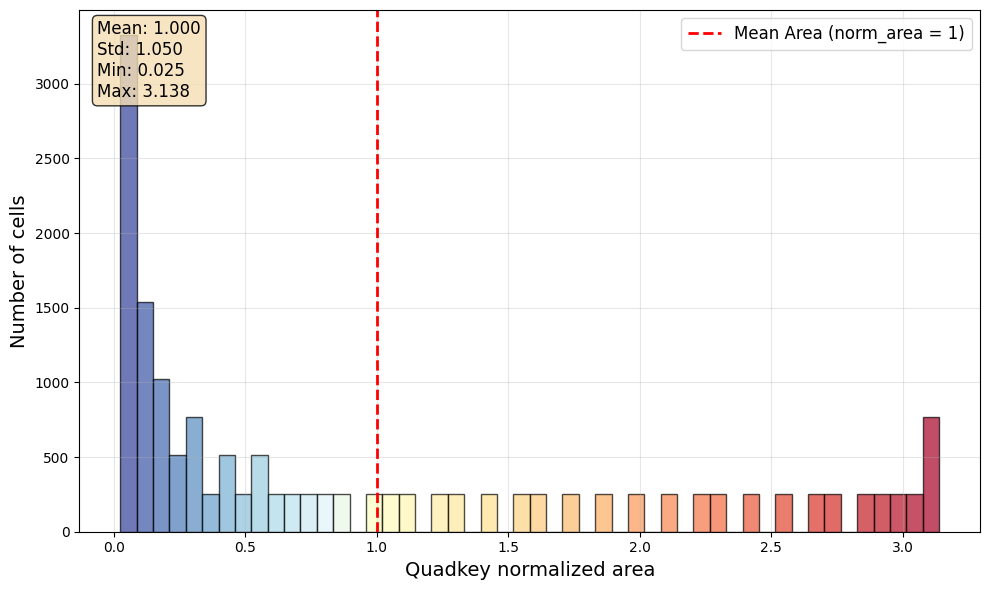

In [2]:
from vgrid.stats.quadkeystats import quadkey_norm_area_hist

quadkey_norm_area_hist(quadkey_inspect)

### Distribution of Quadkey Area Distortions

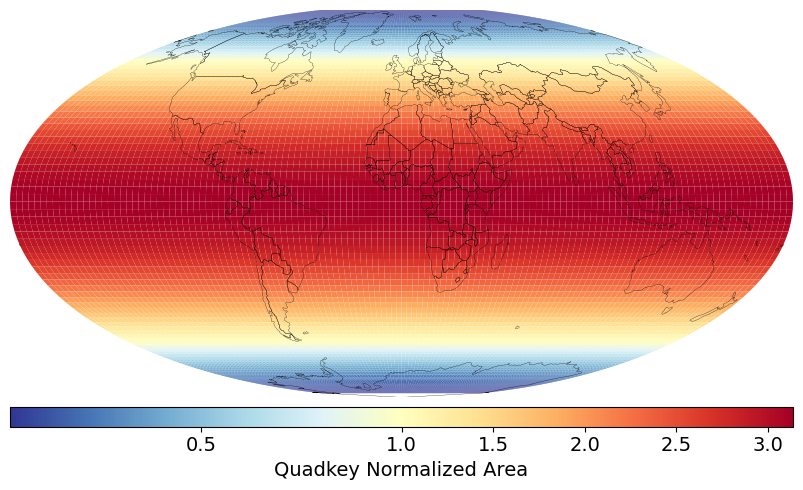

In [3]:
from vgrid.stats.quadkeystats import quadkey_norm_area

quadkey_norm_area(quadkey_inspect)

### Quadkey IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

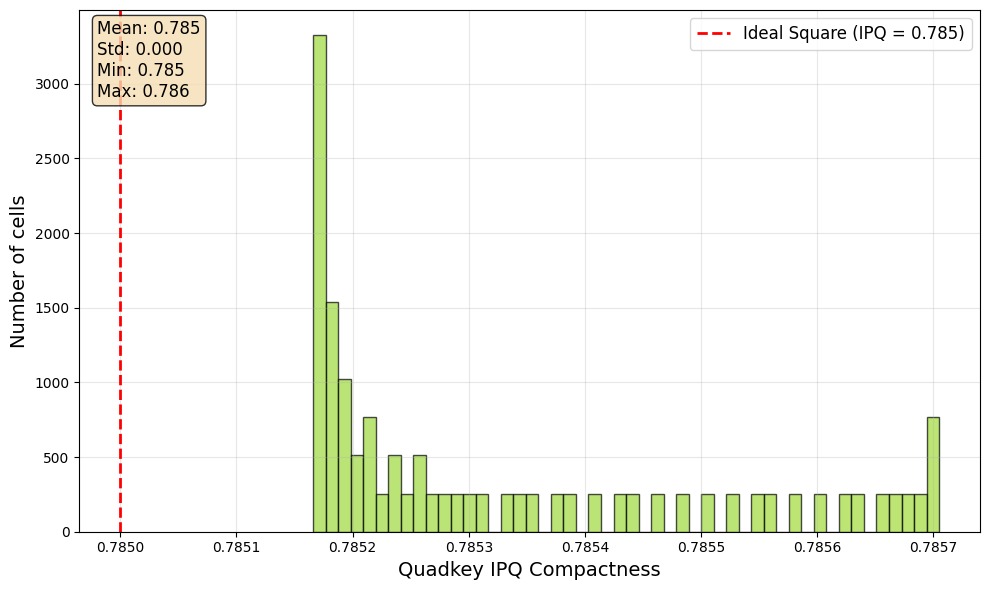

In [4]:
from vgrid.stats.quadkeystats import quadkey_compactness_ipq_hist

quadkey_compactness_ipq_hist(quadkey_inspect)

### Distribution of Quadkey IPQ Compactness

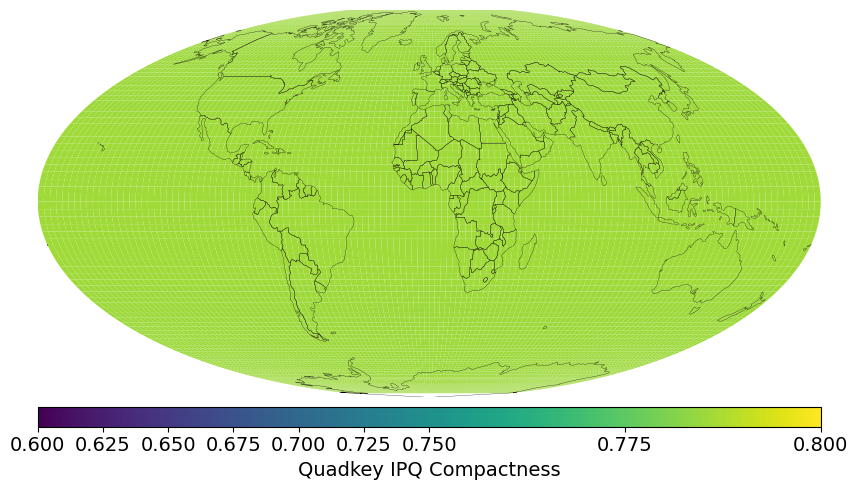

In [5]:
from vgrid.stats.quadkeystats import quadkey_compactness_ipq

quadkey_compactness_ipq(quadkey_inspect)

### Quadkey Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

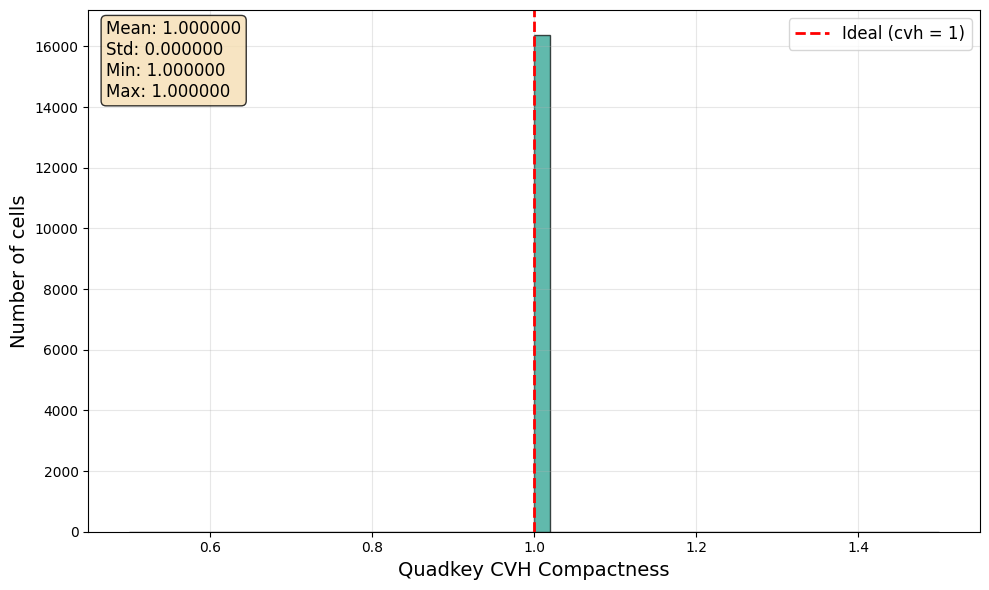

In [6]:
from vgrid.stats.quadkeystats import quadkey_compactness_cvh_hist

quadkey_compactness_cvh_hist(quadkey_inspect)

### Distribution of Quadkey Convex hull Compactness

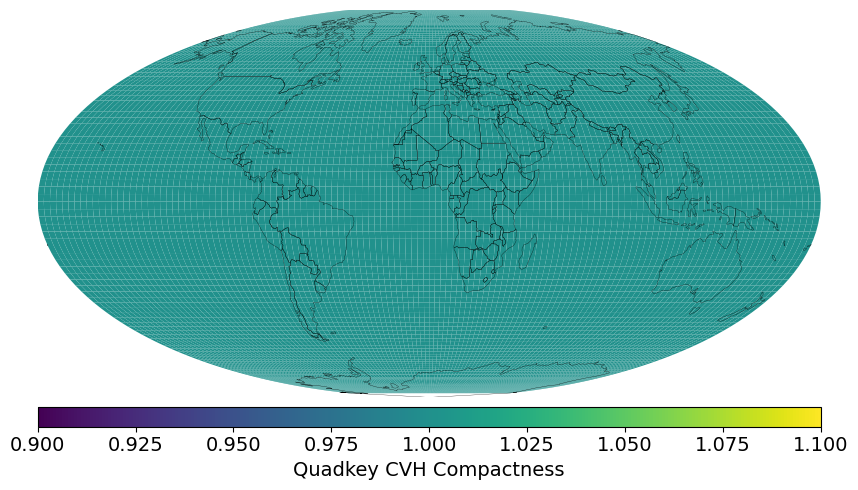

In [7]:
from vgrid.stats.quadkeystats import quadkey_compactness_cvh

quadkey_compactness_cvh(quadkey_inspect)

### Quadkey Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [2]:
from vgrid.stats import quadkeystats

quadkeystats()

resolution     number_of_cells  avg_edge_len_m  avg_cell_area_m2  \
0            0                   1    2.258463e+07      5.100656e+14   
1            1                   4    1.129232e+07      1.275164e+14   
2            2                  16    5.646158e+06      3.187910e+13   
3            3                  64    2.823079e+06      7.969775e+12   
4            4                 256    1.411540e+06      1.992444e+12   
5            5                1024    7.057698e+05      4.981110e+11   
6            6                4096    3.528849e+05      1.245277e+11   
7            7               16384    1.764424e+05      3.113193e+10   
8            8               65536    8.822122e+04      7.782984e+09   
9            9              262144    4.411061e+04      1.945746e+09   
10          10             1048576    2.205531e+04      4.864365e+08   
11          11             4194304    1.102765e+04      1.216091e+08   
12          12            16777216    5.513826e+03      3.040228e+07   
13          13            67108864    2.756913e+03      7.600570e+06   
14          14           268435456    1.378457e+03      1.900143e+06   
15          15          1073741824    6.892283e+02      4.750356e+05   
16          16          4294967296    3.446141e+02      1.187589e+05   
17          17         17179869184    1.723071e+02      2.968973e+04   
18          18         68719476736    8.615354e+01      7.422432e+03   
19          19        274877906944    4.307677e+01      1.855608e+03   
20          20       1099511627776    2.153838e+01      4.639020e+02   
21          21       4398046511104    1.076919e+01      1.159755e+02   
22          22      17592186044416    5.384596e+00      2.899387e+01   
23          23      70368744177664    2.692298e+00      7.248468e+00   
24          24     281474976710656    1.346149e+00      1.812117e+00   
25          25    1125899906842624    6.730745e-01      4.530293e-01   
26          26    4503599627370496    3.365372e-01      1.132573e-01   
27          27   18014398509481984    1.682686e-01      2.831433e-02   
28          28   72057594037927936    8.413431e-02      7.078582e-03   
29          29  288230376151711744    4.206716e-02      1.769646e-03   

           cls_m  
0   4.003022e+07  
1   1.334341e+07  
2   6.439311e+06  
3   3.193858e+06  
4   1.593791e+06  
5   7.965056e+05  
6   3.982042e+05  
7   1.990960e+05  
8   9.954724e+04  
9   4.977353e+04  
10  2.488675e+04  
11  1.244337e+04  
12  6.221687e+03  
13  3.110843e+03  
14  1.555422e+03  
15  7.777108e+02  
16  3.888554e+02  
17  1.944277e+02  
18  9.721385e+01  
19  4.860693e+01  
20  2.430346e+01  
21  1.215173e+01  
22  6.075866e+00  
23  3.037933e+00  
24  1.518966e+00  
25  7.594832e-01  
26  3.797416e-01  
27  1.898708e-01  
28  9.493540e-02  
29  4.746770e-02